In [2]:
import numpy as np
import pandas as pd
pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
from scipy.stats import entropy
import matplotlib.pyplot as plt
import matplotlib
from random import randint

In [3]:
def plot_labelled_bb(impath, bblist, title=None, text_size='large',
                     mode='path', omode='screen', opath=None,
                     figsize=(10, 20), show_image=True, ax=None):
    '''nabbed from clp-vision'''

    if mode == 'path':
        img = plt.imread(impath)
    elif mode == 'img':
        img = impath

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()

    fig.set_size_inches(figsize)

    if not show_image:
        img = np.ones_like(img) * 255
        # img = np.zeros_like(img)
    ax.imshow(img)

    if bblist is not None:
        for (this_bb, this_label) in bblist:
            x, y, w, h = this_bb

            if type(this_label) == tuple:
                edgecolor = this_label[1]
                this_label = this_label[0]
            else:
                edgecolor = 'r'
            ax.add_patch(
                matplotlib.patches.Rectangle(
                    (x, y),
                    w,
                    h,
                    edgecolor=edgecolor,
                    fill=False, linewidth=4
                )
            )
            if this_label != '':
                newx = x + randint(0,w)
                ax.text(newx, y, this_label, size=text_size, style='italic',
                        bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})
    if title is not None:
        ax.set_title(title)

    if show_image:
        ax.axis('off')
    else:
        ax.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False,
            left=False,
            labelleft=False)  # labels along the bottom edge are off

    if omode == 'img':
        fig.savefig(opath, bbox_inches='tight', pad_inches=0)
        plt.close()  # to supress showing the plot in interactive mode

In [4]:
vgobjdf = pd.read_json('/Users/sina/research/data/dsg-vision/Preproc/PreprocOut/vgobjdf.json.gz', orient='split')

In [5]:
vgobjdf.head()

,i_corpus,image_id,obj_id,syn,name,bb
0,5,1,1058498,clock.n.01,clock,"[421, 91, 79, 339]"
1,5,1,5046,street.n.01,street,"[77, 328, 714, 262]"
2,5,1,5045,shade.n.01,shade,"[119, 338, 274, 192]"
3,5,1,1058529,man.n.01,man,"[238, 249, 60, 262]"
4,5,1,5048,gym_shoe.n.01,sneakers,"[243, 489, 52, 26]"


In [6]:
vgregdf = pd.read_json('vgregdf.json.gz', orient='split')

In [7]:
vgregdf.head(10)

,image_id,region_id,object_id,name,synsets
0,1,1382,1058498,clock,[clock.n.01]
1,1,1383,5046,street,[street.n.01]
2,1,1383,5045,shade,[shade.n.01]
3,1,1384,1058529,man,[man.n.01]
4,1,1384,5048,sneakers,[gym_shoe.n.01]
5,1,1385,5050,headlight,[headlight.n.01]
6,1,1385,5049,car,[car.n.01]
7,1,1386,5051,bike,[bicycle.n.01]
8,1,1386,1058535,bike,[bicycle.n.01]
9,1,1432,1058507,sign,[sign.n.02]


In [8]:
vgregdf['syn'] = vgregdf['synsets'].apply(lambda x: x[0] if len(x) > 0 else "")

In [9]:
mndf = pd.read_json('../proc_data_phase0/spellchecking/all_responses_round0-3_cleaned.json.gz', orient='split')

In [10]:
mndf.head()

,vg_img_id,cat,synset,vg_obj_name,responses_r0,opt-outs,vg_domain,top_response_domain_r0,responses_domains_r0,url,...,responses_r2,top_response_domain_r2,responses_domains_r3,responses_r3,top_response_domain_r3,vg_object_id,all_responses,clean,canon,spellchecked
0,2357077,person,athlete.n.01,batter,"{'man': 4, 'batter': 2, 'baseball player': 1, ...",{},people,people,"{'people': 0.889, '$baseball player': 0.111}",http://object-naming-amore.upf.edu//2357077_81...,...,"{'batter': 3, 'baseball player': 1, 'helmet': ...",people,"{'people': 0.75, '$bat': 0.125, 'clothing': 0....","{'player': 3, 'man': 2, 'batter': 1, 'bat': 1,...",people,815223,"{'man': 11, 'batter': 8, 'baseball player': 2,...","{'man': 11, 'batter': 8, 'baseball player': 2,...","{'man': 11, 'batter': 8, 'baseball player': 2,...","{'man': 11, 'batter': 8, 'baseball player': 2,..."
1,2378759,article of clothing,overgarment.n.01,jacket,"{'jacket': 3, 'sweatshirt': 2, 'man': 2, 'hood...",{},clothing,clothing,"{'clothing': 0.333, '$sweatshirt': 0.222, 'peo...",http://object-naming-amore.upf.edu//2378759_13...,...,"{'man': 4, 'jacket': 3, 'sweatshirt': 1, 'hood...",people,"{'clothing': 0.556, 'people': 0.222, '$sweatsh...","{'jacket': 4, 'man': 2, 'sweatshirt': 1, 'hood...",clothing,1365136,"{'jacket': 14, 'sweatshirt': 4, 'man': 11, 'ho...","{'jacket': 14, 'sweatshirt': 4, 'man': 11, 'ho...","{'jacket': 14, 'sweatshirt': 4, 'man': 11, 'ho...","{'jacket': 14, 'sweatshirt': 4, 'man': 11, 'ho..."
2,2319953,animal,ungulate.n.01,giraffe,{'giraffe': 7},{'#bbox': 2},animals_plants,animals_plants,{'animals_plants': 1.0},http://object-naming-amore.upf.edu//2319953_30...,...,{'giraffe': 9},animals_plants,"{'animals_plants': 0.889, 'people': 0.111}","{'giraffe': 8, 'woman': 1}",animals_plants,3089834,"{'giraffe': 32, 'woman': 1}","{'giraffe': 32, 'woman': 1}","{'giraffe': 32, 'woman': 1}","{'giraffe': 32, 'woman': 1}"
3,2361401,animal,ungulate.n.01,giraffe,{'giraffe': 9},{},animals_plants,animals_plants,{'animals_plants': 1.0},http://object-naming-amore.upf.edu//2361401_23...,...,{'giraffe': 9},animals_plants,{'animals_plants': 1.0},{'giraffe': 9},animals_plants,2363103,{'giraffe': 36},{'giraffe': 36},{'giraffe': 36},{'giraffe': 36}
4,2401994,"food, nutrient",dish.n.02,sandwich,"{'sandwich': 6, 'food': 2, 'hotdog': 1}",{},food,food,"{'food': 0.889, '$hotdog': 0.111}",http://object-naming-amore.upf.edu//2401994_11...,...,{'sandwich': 9},food,"{'food': 0.778, '$foot': 0.111, '$burger': 0.111}","{'food': 3, 'sandwich': 3, 'foot': 1, 'cake': ...",food,1141828,"{'sandwich': 25, 'food': 6, 'hotdog': 1, 'sand...","{'sandwich': 25, 'food': 6, 'hotdog': 1, 'sand...","{'sandwich': 26, 'food': 7, 'hotdog': 1, 'cake...","{'sandwich': 26, 'food': 7, 'hotdog': 1, 'cake..."


In [11]:
len(mndf)

25315

In [18]:
anames = [n.strip() for n in open('/Users/sina/Downloads/aliased_MN442.txt').readlines()]
mnvocab = []
for n in anames:
    if ',' in n:
        mnvocab += n.split(',')
    else:
        mnvocab.append(n)

In [28]:
vgregdf['is_entry_name'] = vgregdf['name'].apply(lambda x: x in mnvocab)

In [29]:
entryreg = vgregdf.query('is_entry_name == True')

In [30]:
len(set(entryreg.object_id))/len(set(vgregdf.object_id))

0.5167024927325274

In [31]:
len(set(entryreg.object_id))

1953772

In [ ]:
entryobj['']

In [24]:
len(vgobjdf)

3895567

In [26]:
vgobjdf.head()

,i_corpus,image_id,obj_id,syn,name,bb,is_entry_name
0,5,1,1058498,clock.n.01,clock,"[421, 91, 79, 339]",True
1,5,1,5046,street.n.01,street,"[77, 328, 714, 262]",True
2,5,1,5045,shade.n.01,shade,"[119, 338, 274, 192]",False
3,5,1,1058529,man.n.01,man,"[238, 249, 60, 262]",True
4,5,1,5048,gym_shoe.n.01,sneakers,"[243, 489, 52, 26]",False


In [27]:
vgregdf.head()

,image_id,region_id,object_id,name,synsets,syn
0,1,1382,1058498,clock,[clock.n.01],clock.n.01
1,1,1383,5046,street,[street.n.01],street.n.01
2,1,1383,5045,shade,[shade.n.01],shade.n.01
3,1,1384,1058529,man,[man.n.01],man.n.01
4,1,1384,5048,sneakers,[gym_shoe.n.01],gym_shoe.n.01


In [11]:
fulldf = mndf.merge(vgobjdf, how='left', left_on=['vg_img_id', 'vg_object_id','vg_obj_name'], 
                       right_on=['image_id', 'obj_id','name'])

In [12]:
fulldf.columns

Index(['vg_img_id', 'cat', 'synset', 'vg_obj_name', 'responses_r0', 'opt-outs',
       'vg_domain', 'top_response_domain_r0', 'responses_domains_r0', 'url',
       'sample_type', 'responses_domains_r1', 'responses_r1',
       'top_response_domain_r1', 'responses_domains_r2', 'responses_r2',
       'top_response_domain_r2', 'responses_domains_r3', 'responses_r3',
       'top_response_domain_r3', 'vg_object_id', 'all_responses', 'clean',
       'canon', 'spellchecked', 'i_corpus', 'image_id', 'obj_id', 'syn',
       'name', 'bb'],
      dtype='object')

In [13]:
fulldf['ntypes'] = fulldf['spellchecked'].apply(len)

In [14]:
fulldf['spellchecked'] = fulldf['spellchecked'].apply(lambda x: Counter(x))


In [15]:
fulldf['ntokens'] = fulldf['spellchecked'].apply(lambda x: sum(list(x.values())))


In [16]:
fullvocab = sum(list(fulldf['spellchecked']), Counter()) 

In [17]:
fullvocab.most_common(10)

[('train', 37870),
 ('man', 33643),
 ('woman', 33385),
 ('shirt', 30698),
 ('giraffe', 30044),
 ('bed', 28408),
 ('horse', 26716),
 ('cat', 26109),
 ('table', 25734),
 ('dog', 22876)]

In [18]:
fldf = pd.read_json('../exploration/data/flickr30k_ref_anno.json.gz', orient='split')
codf = pd.read_json('../exploration/data/refcoco_anno-dep-pos-wn-attr.json.gz', orient='split')
codf.rename(columns={'image_id':'region_id','rex_id':'image_id'},inplace=True)
codf.head()

,image_id,region_id,basicDependencies,parse,tagged_parse,wn_anno_parse,attribute_parse
0,581857,1719310,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",(ROOT\n (NP\n (NP (DT the) (NN lady))\n ...,"[[the, DT], [lady, NN], [with, IN], [the, DT],...","[[the, None], [lady.n.01, noun.person], [with,...","[[lady, NAME], [with, REL], [blue, COLOR]]"
1,581857,1719310,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",(ROOT\n (FRAG\n (NP (NN lady))\n (PP (I...,"[[lady, NN], [with, IN], [back, RB], [to, TO],...","[[lady.n.01, noun.person], [with, None], [back...","[[lady, NAME], [with, REL]]"
2,581857,1719310,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",(ROOT\n (NP (JJ blue) (NN shirt))),"[[blue, JJ], [shirt, NN]]","[[blue.s.01, adj.all], [shirt.n.01, noun.artif...","[[blue, COLOR], [shirt, NAME]]"
3,581857,463958,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",(ROOT\n (FRAG\n (NP (NN woman))\n (PP (...,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN...","[[woman.n.01, noun.person], [in, None], [grey....","[[woman, NAME], [gray, COLOR], [right, LOC]]"
4,581857,463958,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",(ROOT\n (NP\n (NP (NN woman))\n (NP (JJ...,"[[woman, NN], [gray, JJ], [right, NN]]","[[woman.n.01, noun.person], [grey.s.01, adj.al...","[[woman, NAME], [gray, COLOR], [right, LOC]]"


In [19]:
def get_name(tlist):
    for(word,tag) in tlist:
        if tag == 'NAME':
            return word
    return ''
codf['name'] = codf['attribute_parse'].apply(lambda x: get_name(x))
fldf['name'] = fldf['attr_name_stnf'].apply(lambda x: get_name(x))

In [20]:
mnobjects = set(list(mndf.vg_object_id))

In [21]:
len(mnobjects)

25315

In [22]:
vgobjects = set(vgregdf['object_id'])

In [23]:
len(vgobjects)

3781232

In [25]:
len([obj for obj in mnobjects if not obj in vgobjects])

92

In [26]:
vgobjects2 = set(vgobjdf['obj_id'])

In [27]:
len(vgobjects2)

3802374

In [28]:
len([obj for obj in mnobjects if not obj in vgobjects2])

0

In [29]:
vgreg_submn = vgregdf[vgregdf['object_id'].isin(mnobjects)]

In [30]:
len(vgreg_submn)

182720

In [1]:
vgreg_submn.head()

NameError: name 'vgreg_submn' is not defined

In [ ]:
vgob

In [31]:
missing = [obj for obj in mnobjects if not obj in vgobjects]

In [45]:
for obj in missing:
    odict = dict(vgobjdf.query('obj_id == %s'%obj).iloc[0])
    odict['synsets'] = [odict['syn']]
    odict['object_id'] = odict['obj_id']
    odict['region_id'] = -1
    del odict['obj_id']
    del odict['i_corpus']
    del odict['bb']
    print(odict)
    vgreg_submn = vgreg_submn.append(odict,ignore_index=True)

{'image_id': 2340204, 'syn': 'shirt.n.01', 'name': 'shirt', 'synsets': ['shirt.n.01'], 'object_id': 2623467, 'region_id': -1}
{'image_id': 713039, 'syn': 'catcher.n.01', 'name': 'catcher', 'synsets': ['catcher.n.01'], 'object_id': 1577996, 'region_id': -1}
{'image_id': 713040, 'syn': 'table.n.02', 'name': 'table', 'synsets': ['table.n.02'], 'object_id': 1578070, 'region_id': -1}
{'image_id': 2320797, 'syn': 'man.n.01', 'name': 'man', 'synsets': ['man.n.01'], 'object_id': 3282597, 'region_id': -1}
{'image_id': 2416311, 'syn': 'chair.n.01', 'name': 'chair', 'synsets': ['chair.n.01'], 'object_id': 2895252, 'region_id': -1}
{'image_id': 2315843, 'syn': 'chair.n.01', 'name': 'chair', 'synsets': ['chair.n.01'], 'object_id': 2765441, 'region_id': -1}
{'image_id': 713669, 'syn': 'jacket.n.01', 'name': 'jacket', 'synsets': ['jacket.n.01'], 'object_id': 1587334, 'region_id': -1}
{'image_id': 2315735, 'syn': 'zebra.n.01', 'name': 'zebra', 'synsets': ['zebra.n.01'], 'object_id': 3291588, 'region_i

{'image_id': 2214, 'syn': 'cabinet.n.01', 'name': 'cabinet', 'synsets': ['cabinet.n.01'], 'object_id': 3640307, 'region_id': -1}
{'image_id': 2417959, 'syn': 'male_child.n.01', 'name': 'boy', 'synsets': ['male_child.n.01'], 'object_id': 2723014, 'region_id': -1}
{'image_id': 2327578, 'syn': 'batter.n.01', 'name': 'batter', 'synsets': ['batter.n.01'], 'object_id': 2723789, 'region_id': -1}
{'image_id': 1997, 'syn': 'rug.n.01', 'name': 'rug', 'synsets': ['rug.n.01'], 'object_id': 1546005, 'region_id': -1}
{'image_id': 2507, 'syn': 'train.n.01', 'name': 'train', 'synsets': ['train.n.01'], 'object_id': 1549823, 'region_id': -1}
{'image_id': 2556, 'syn': 'lantern.n.01', 'name': 'lantern', 'synsets': ['lantern.n.01'], 'object_id': 1550300, 'region_id': -1}
{'image_id': 2645, 'syn': 'jeep.n.01', 'name': 'jeep', 'synsets': ['jeep.n.01'], 'object_id': 1550832, 'region_id': -1}
{'image_id': 2417765, 'syn': 'table.n.02', 'name': 'table', 'synsets': ['table.n.02'], 'object_id': 3124581, 'region_id

In [46]:
len(vgreg_submn)

182812

In [47]:
aggdf = pd.DataFrame(vgreg_submn.groupby('object_id')['name'].apply(lambda x: list(x)))

In [48]:
aggdf['ntoken'] = aggdf['name'].apply(lambda x: len(x))

In [49]:
aggdf['ntypes'] = aggdf['name'].apply(lambda x: len(set(x)))

In [50]:
np.mean(aggdf['ntypes'])

1.0790440450325893

In [51]:
aggdf_sub = aggdf #[aggdf.index.isin(mndf.vg_object_id)]

In [52]:
len(aggdf_sub)

25315

In [53]:
aggdf_co = pd.DataFrame(codf.groupby('region_id')['name'].apply(lambda x: list(x)))
aggdf_fl = pd.DataFrame(fldf.groupby('region_id')['name'].apply(lambda x: list(x)))

In [54]:
aggdf_co.head()

,name
region_id,
166,"[, dog, ]"
433,"[topback, dog, hotdog]"
566,"[dog, dog, dog]"
595,"[dog, weener, dog]"
765,"[bun, sandwich, sandwich]"


In [55]:
len(aggdf_co)

50000

In [56]:
aggdf_co['names'] = aggdf_co['name'].apply(lambda x: [w for w in x if len(w) > 0])
aggdf_fl['names'] = aggdf_fl['name'].apply(lambda x: [w for w in x if len(w) > 0])

In [57]:
aggdf_fl['ntoken'] = aggdf_fl['names'].apply(lambda x: len(x))
aggdf_fl['ntoken'] = aggdf_fl['names'].apply(lambda x: len(x))

In [58]:
aggdf_co['ntypes'] = aggdf_co['names'].apply(lambda x: len(set(x)))
aggdf_fl['ntypes'] = aggdf_fl['names'].apply(lambda x: len(set(x)))

In [59]:
comptable = []

In [60]:
comptable.append(('# objects',
                 len(set(codf['region_id'])),
                  len(set(fldf['region_id'])),
                 len(set(vgregdf['object_id'])),
                 len(set(vgreg_submn['object_id'])),
                 len(fulldf)
                 ))

In [61]:
comptable.append(('vocab size',
                  len(set(codf['name'])),
                  len(set(fldf['name'])),
                 len(set(vgregdf['name'])),
                 len(set(vgreg_submn['name'])),
                 len(fullvocab)
                 ))

In [62]:
#comptable.append(('# synsets',
#                 len(set(vgregdf['syn'])),
#                 len(set(vgreg_submn['syn'])),
#                 len(set(fulldf['syn']))
#                 ))

In [63]:
comptable.append(('av. annotations/object',
                  len(codf['region_id'])/len(set(codf['region_id'])),
                  len(fldf['region_id'])/len(set(fldf['region_id'])),
                 len(vgregdf['object_id'])/len(set(vgregdf['object_id'])),
                 len(vgreg_submn['object_id'])/len(set(vgreg_submn['object_id'])),
                 np.mean(fulldf['ntokens'])
                 ))

In [64]:
comptable.append(('% objects with n types > 1',
                  len(aggdf_co.query('ntypes > 1'))/len(aggdf_co),
                  len(aggdf_fl.query('ntypes > 1'))/len(aggdf_fl),
                 len(aggdf.query('ntypes > 1'))/len(aggdf),
                 len(aggdf_sub.query('ntypes > 1'))/len(aggdf_sub),
                 len(fulldf.query('ntypes > 1'))/len(fulldf)
                 ))

In [65]:
comptable.append(('av. types/object',
                  np.mean(aggdf_co['ntypes']),
                  np.mean(aggdf_fl['ntypes']),
                 np.mean(aggdf['ntypes']),
                 np.mean(aggdf_sub['ntypes']),
                 np.mean(fulldf['ntypes'])
                 ))

In [66]:
odf = pd.DataFrame(comptable,columns=['..','RefCoco','Flickr30k','VG','VGmn','MN'])
odf

,..,RefCoco,Flickr30k,VG,VGmn,MN
0,# objects,"50,000.00","243,801.00","3,781,232.00","25,315.00","25,315.00"
1,vocab size,"5,004.00","10,423.00","105,441.00","1,061.00","7,970.00"
2,av. annotations/object,2.84,2.30,1.69,7.22,35.30
3,% objects with n types > 1,0.68,0.29,0.05,0.05,0.93
4,av. types/object,1.88,1.38,1.08,1.08,5.70


In [67]:
print(odf.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                         .. &   RefCoco &  Flickr30k &           VG &      VGmn &        MN \\
\midrule
                  \# objects & 50,000.00 & 243,801.00 & 3,781,232.00 & 25,315.00 & 25,315.00 \\
                 vocab size &  5,004.00 &  10,423.00 &   105,441.00 &  1,061.00 &  7,970.00 \\
     av. annotations/object &      2.84 &       2.30 &         1.69 &      7.22 &     35.30 \\
 \% objects with n types > 1 &      0.68 &       0.29 &         0.05 &      0.05 &      0.93 \\
           av. types/object &      1.88 &       1.38 &         1.08 &      1.08 &      5.70 \\
\bottomrule
\end{tabular}



In [147]:
def interfering_objects(fulldf, vgobjdf, iou_threshold=0.0, use_mn=True):
    overlaps = []
    print(len(fulldf))
    #fulldf = fulldf[fulldf.vg_domain.apply(lambda d: d not in domain_blacklist)]
    #print(len(fulldf))
    for n, trial in fulldf.iterrows():
        imgid = trial['vg_img_id']
        bb_test = trial['bb']
        name_test = trial['vg_obj_name']

        tempdf = vgobjdf[vgobjdf.image_id == imgid]
        for n, obj in tempdf.iterrows():
            #print(obj['name'], obj['bb'])
            o_name = obj['name']
            o_iou = iou(bb_test, obj['bb'])
            if trial['obj_id'] != obj['obj_id'] and \
                o_iou > iou_threshold:
                if (o_name in trial['spellchecked'] and use_mn) or (not use_mn):
                    overlaps.append((imgid, trial['obj_id'], obj['obj_id'], name_test, o_name, 
                                bb_test, obj['bb'], trial['spellchecked'],o_iou))
    return overlaps

def iou(box_a, box_b):
    # (x,y) coordinates of intersection
    xa = max(box_a[0], box_b[0])
    ya = max(box_a[1], box_b[1])
    xb = min(box_a[2], box_b[2])
    yb = min(box_a[3], box_b[3])
    
    # compute the area of intersection rectangle
    intersect = max(0, xb - xa + 1) * max(0, yb - ya + 1)
 
    # total area of both bbs
    area_a = (box_a[2] - box_a[0] + 1) * (box_a[3] - box_a[1] + 1)
    area_b = (box_b[2] - box_b[0] + 1) * (box_b[3] - box_b[1] + 1)
 
    #failsafe for no overlap
    if intersect == 0:
        return 0
    
    return intersect / (area_a + area_b - intersect)

In [136]:
overlist = interfering_objects(fulldf,vgobjdf,iou_threshold=0.6)

25315


In [148]:
overlist2 = interfering_objects(fulldf,vgobjdf,iou_threshold=0.6,use_mn=False)

25315


In [137]:
len(overlist)

12772

In [149]:
len(overlist2)

19396

In [ ]:
vgimdf = pd.read_json('/Users/sina/research/data/dsg-vision/Preproc/PreprocOut/vgobjdf.json.gz', orient='split')

In [138]:
infdf = pd.DataFrame(overlist, columns='img_id obj_id_a obj_id_b name_a name_b bb_a bb_b spellchecked iou'.split())

In [139]:
infdf.query('iou < 0.70')

,img_id,obj_id_a,obj_id_b,name_a,name_b,bb_a,bb_b,spellchecked,iou
0,2361401,2363103,1840452,giraffe,giraffe,"[8, 0, 314, 324]","[5, 54, 319, 401]",{'giraffe': 36},0.66
2,2322791,3054703,3337618,bridge,bridge,"[1, 79, 497, 132]","[4, 80, 493, 115]",{'bridge': 35},0.66
5,2315498,2898470,3963468,train,train,"[42, 123, 422, 180]","[47, 117, 413, 207]","{'train': 34, 'sub train': 1, 'vehicle': 1}",0.62
11,2415935,3077264,3457730,train,train,"[0, 67, 497, 183]","[96, 66, 402, 185]","{'train': 31, 'poles': 1, 'platform': 1, 'pill...",0.61
13,2319978,3393197,3419208,airplane,plane,"[3, 24, 451, 226]","[24, 56, 407, 247]","{'airplane': 18, 'plane': 15, 'jet': 2, 'jet p...",0.66
21,2400531,408133,3817999,boy,person,"[119, 26, 155, 311]","[113, 11, 159, 259]","{'skater': 10, 'person': 3, 'man': 4, 'skatebo...",0.64
22,2400531,408133,3818003,boy,man,"[119, 26, 155, 311]","[113, 10, 158, 259]","{'skater': 10, 'person': 3, 'man': 4, 'skatebo...",0.64
26,2368995,3064092,2310507,aircraft,plane,"[3, 103, 437, 146]","[0, 111, 500, 141]","{'airplane': 21, 'plane': 13, 'jet': 1}",0.64
28,2368995,3064092,3865864,aircraft,plane,"[3, 103, 437, 146]","[1, 87, 480, 145]","{'airplane': 21, 'plane': 13, 'jet': 1}",0.65
29,2368995,3064092,3497864,aircraft,plane,"[3, 103, 437, 146]","[2, 99, 497, 159]","{'airplane': 21, 'plane': 13, 'jet': 1}",0.63


In [195]:
def labeled_bbs(df, object_id):
    imgdf = df[df.obj_id_a==object_id]
    print(imgdf)
    bb_labels = []
    bb_labels.append((imgdf.iloc[0].bb_a, (str(object_id)+":"+imgdf.iloc[0].name_a, 'g')))
    for n, row in imgdf.iterrows():
        bb_labels.append((row.bb_b, (str(row.obj_id_b) +":"+row.name_b,'r')))
    print(bb_labels)
    return bb_labels

     img_id  obj_id_a  obj_id_b name_a    name_b                bb_a  \
86  2359157   1993176   2173612   duck      duck  [48, 85, 352, 177]   
87  2359157   1993176   2013215   duck  duckling  [48, 85, 352, 177]   
88  2359157   1993176   1968412   duck      duck  [48, 85, 352, 177]   
89  2359157   1993176   2107420   duck  duckling  [48, 85, 352, 177]   
90  2359157   1993176   2616637   duck  duckling  [48, 85, 352, 177]   
91  2359157   1993176   2350033   duck      duck  [48, 85, 352, 177]   
92  2359157   1993176   2335189   duck      duck  [48, 85, 352, 177]   

                  bb_b                                       spellchecked  iou  
86  [44, 72, 392, 193]  {'duck': 29, 'duckling': 3, 'bird': 2, 'dove':... 0.67  
87  [50, 76, 352, 190]  {'duck': 29, 'duckling': 3, 'bird': 2, 'dove':... 0.80  
88  [59, 69, 342, 201]  {'duck': 29, 'duckling': 3, 'bird': 2, 'dove':... 0.66  
89  [34, 84, 379, 192]  {'duck': 29, 'duckling': 3, 'bird': 2, 'dove':... 0.75  
90  [15, 83, 384, 

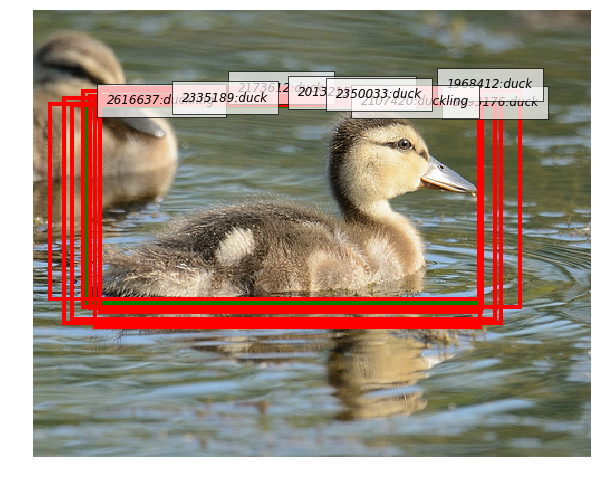

In [200]:
index = 91
row = infdf.iloc[index]
plot_labelled_bb(vgpath+str(row.img_id)+'.jpg', labeled_bbs(infdf, row.obj_id_a))

In [141]:
iou([42, 123, 422, 180],[47, 117, 413, 207])

0.6222339150515946

In [96]:
overlist[:200]

[(2351178,
  2398820,
  2218813,
  'car',
  'truck',
  [18, 58, 408, 424],
  [26, 82, 403, 410],
  Counter({'truck': 28,
           'car': 3,
           'pickup truck': 2,
           'surfboard': 1,
           'rescue truck': 1,
           'vehicle': 1}),
  0.866652264507272),
 (2319978,
  3393197,
  3118936,
  'airplane',
  'plane',
  [3, 24, 451, 226],
  [0, 26, 456, 221],
  Counter({'airplane': 18, 'plane': 15, 'jet': 2, 'jet plane': 1}),
  0.9491883729709324),
 (2319978,
  3393197,
  3292076,
  'airplane',
  'plane',
  [3, 24, 451, 226],
  [11, 30, 455, 237],
  Counter({'airplane': 18, 'plane': 15, 'jet': 2, 'jet plane': 1}),
  0.8972116079727357),
 (2319978,
  3393197,
  2721181,
  'airplane',
  'plane',
  [3, 24, 451, 226],
  [3, 16, 460, 242],
  Counter({'airplane': 18, 'plane': 15, 'jet': 2, 'jet plane': 1}),
  0.8767000750245273),
 (2319978,
  3393197,
  3411053,
  'airplane',
  'plane',
  [3, 24, 451, 226],
  [6, 20, 471, 220],
  Counter({'airplane': 18, 'plane': 15, 'jet': 2

In [150]:
infdf2 = pd.DataFrame(overlist2, columns='img_id obj_id_a obj_id_b name_a name_b bb_a bb_b spellchecked iou'.split())

In [167]:
infdf2

,img_id,obj_id_a,obj_id_b,name_a,name_b,bb_a,bb_b,spellchecked,iou
0,2378759,1365136,1365158,jacket,boy,"[0, 215, 171, 285]","[11, 197, 180, 300]","{'jacket': 14, 'sweatshirt': 4, 'man': 11, 'ho...",0.62
1,2319953,3089834,3168331,giraffe,giraffes,"[101, 132, 191, 265]","[103, 130, 191, 267]","{'giraffe': 32, 'woman': 1}",0.95
2,2361401,2363103,1840452,giraffe,giraffe,"[8, 0, 314, 324]","[5, 54, 319, 401]",{'giraffe': 36},0.66
3,2361401,2363103,3755160,giraffe,tree,"[8, 0, 314, 324]","[1, 2, 317, 236]",{'giraffe': 36},0.71
4,2361401,2363103,2328587,giraffe,giraffe,"[8, 0, 314, 324]","[11, 45, 321, 342]",{'giraffe': 36},0.79
5,2361401,2363103,2146272,giraffe,tree,"[8, 0, 314, 324]","[16, 0, 313, 350]",{'giraffe': 36},0.90
6,2361401,2363103,2079488,giraffe,giraffes,"[8, 0, 314, 324]","[21, 46, 303, 401]",{'giraffe': 36},0.65
7,2406452,1101992,1101991,bed,comforter,"[0, 174, 499, 200]","[0, 173, 499, 202]","{'bed': 33, 'mattress': 1}",0.90
8,2322791,3054703,3337618,bridge,bridge,"[1, 79, 497, 132]","[4, 80, 493, 115]",{'bridge': 35},0.66
9,2394825,460665,460648,salad,dressing,"[50, 55, 346, 233]","[51, 57, 347, 232]","{'salad': 17, 'vegetables': 4, 'dinner': 1, 'f...",0.98


In [207]:
index = 13
row = infdf2.iloc[index]
plot_labelled_bb(vgpath+str(row.img_id)+'.jpg', labeled_bbs(infdf2, row.obj_id_a),omode="img",opath="vulture.png")
labeled_bbs_regions(infdf2,vgregdf,reg2df,row.obj_id_a)

     img_id  obj_id_a  obj_id_b name_a     name_b                 bb_a  \
13  2350004   3595788   2286017   bird    vulture  [58, 162, 366, 260]   
14  2350004   3595788   2385747   bird  black cap  [58, 162, 366, 260]   
15  2350004   3595788   2681429   bird  long beak  [58, 162, 366, 260]   
16  2350004   3595788   2346210   bird    vulture  [58, 162, 366, 260]   

                   bb_b                                   spellchecked  iou  
13  [59, 164, 365, 257]  {'bird': 32, 'crow': 1, 'owl': 1, 'eagle': 1} 0.94  
14  [57, 156, 363, 267]  {'bird': 32, 'crow': 1, 'owl': 1, 'eagle': 1} 0.87  
15  [72, 128, 373, 250]  {'bird': 32, 'crow': 1, 'owl': 1, 'eagle': 1} 0.63  
16  [66, 154, 362, 279]  {'bird': 32, 'crow': 1, 'owl': 1, 'eagle': 1} 0.76  
[([58, 162, 366, 260], ('3595788:bird', 'g')), ([59, 164, 365, 257], ('2286017:vulture', 'r')), ([57, 156, 363, 267], ('2385747:black cap', 'r')), ([72, 128, 373, 250], ('2681429:long beak', 'r')), ([66, 154, 362, 279], ('2346210:vulture',

([([58, 162, 366, 260], (3595788, 'g')),
  ([59, 164, 365, 257], (2286017, 'r')),
  ([57, 156, 363, 267], (2385747, 'r')),
  ([72, 128, 373, 250], (2681429, 'r')),
  ([66, 154, 362, 279], (2346210, 'r'))],
 {3595788: [['the bird is black in color'],
   ['nose of the bird'],
   ['a bird relaxing in stand'],
   ['small white beak of bird'],
   ['large black talon of bird'],
   ['a bird on a green pole'],
   ['a green bar under bird'],
   ['Black bird on green rail'],
   ['small black eye of bird']],
  2286017: [['large black vulture on fence'], ['a vulture on bar']],
  2385747: [['small white beak of bird']],
  2681429: [['a semi long beak']],
  2346210: [['a black and gray vulture']]})

In [189]:
def labeled_bbs_regions(df, df2, df3, object_id):
    imgdf = df[df.obj_id_a==object_id]
    #print(imgdf)
    bb_labels = []
    bb_labels.append((imgdf.iloc[0].bb_a, (imgdf.iloc[0].obj_id_a, 'g')))
    for n, row in imgdf.iterrows():
        bb_labels.append((row.bb_b, (row.obj_id_b,'r')))
    #print(bb_labels)
    
    obj2regions = {}
    for o in [imgdf.iloc[0].obj_id_a] + list(imgdf.obj_id_b):
        objdf = df2.query('object_id == %d'%int(o))
        names = list(objdf.name)
        regions = list(objdf.region_id)
        obj2regions[o] = []
        for r in regions:
            rdf = df3.query('region_id == %s' %r)
            obj2regions[o].append(list(rdf.phrase))
    return bb_labels, obj2regions

In [160]:
aggdf.query('index == 2346210')

,name,ntoken,ntypes
object_id,,,
2346210,[vulture],1,1


In [161]:
vgregdf.query('object_id == 2346210')

,image_id,region_id,object_id,name,synsets,syn
4246903,2350004,3144796,2346210,vulture,[vulture.n.01],vulture.n.01


In [169]:
reg2df = pd.read_json('/Volumes/SHK-Dropbox/dsg-vision/PreprocOut/vgregdf.json.gz', orient='split')

In [170]:
reg2df.head()

,i_corpus,image_id,coco_id,flickr_id,region_id,phrase,bb,rel_ids,rels,pphrase
0,5,1,nan,nan,1382,the clock is green in colour,"[421, 57, 82, 139]",None,None,None
1,5,1,nan,nan,1383,shade is along the street,"[194, 372, 182, 109]",[15927],"[[5045, ON, along.r.01, 5046]]",shade|5045|shade.n.01 is along the street|5046...
2,5,1,nan,nan,1384,man is wearing sneakers,"[241, 491, 61, 30]",[15928],"[[1058529, wears, wear.v.01, 5048]]",man|1058529|man.n.01 is wearing sneakers|5048|...
3,5,1,nan,nan,1385,cars headlights are off,"[617, 377, 36, 36]",[15929],"[[5049, has, have.v.01, 5050]]",
4,5,1,nan,nan,1386,bikes are parked at the far edge,"[322, 298, 41, 49]",None,None,None


In [213]:
reg2df.query('image_id == 2394825')

,i_corpus,image_id,coco_id,flickr_id,region_id,phrase,bb,rel_ids,rels,pphrase
1431925,5,2394825,"334,884.00","6,822,267,986.00",1004688,Green vegetables in a bowel,"[177, 113, 198, 128]","[1029592, 1029593]","[[460631, in a, in.r.01, 460632], [460633, in ...",
1431926,5,2394825,"334,884.00","6,822,267,986.00",1004689,Orange carrots in a bowel,"[131, 197, 105, 68]","[1029594, 1029595, 1029596]","[[460634, in a, in.r.01, 460632], [460633, in ...",
1431927,5,2394825,"334,884.00","6,822,267,986.00",1004690,Dates in a bowel,"[133, 76, 154, 67]","[1029597, 1029598, 1029599, 1029600, 1029601]","[[460636, in a, in.r.01, 460632], [460637, in ...",
1431928,5,2394825,"334,884.00","6,822,267,986.00",1004691,Salad in a bowel,"[98, 63, 275, 195]",[1029602],"[[460665, in a, in.r.01, 460632]]",
1431929,5,2394825,"334,884.00","6,822,267,986.00",1004692,White bowel on a table,"[55, 16, 372, 290]",[1029603],"[[460632, on a, along.r.01, 460642]]",
1431930,5,2394825,"334,884.00","6,822,267,986.00",1004693,Vegetables in a bowel,"[193, 62, 215, 189]","[1029604, 1029605]","[[460631, in a, in.r.01, 460632], [460633, in ...",
1431931,5,2394825,"334,884.00","6,822,267,986.00",1004694,Table with a bowel on it,"[16, 73, 195, 258]","[1029606, 1029607]","[[460632, on a, along.r.01, 460642], [460642, ...",
1431932,5,2394825,"334,884.00","6,822,267,986.00",1004695,Bowel full of food,"[63, 16, 357, 225]",None,None,None
1431933,5,2394825,"334,884.00","6,822,267,986.00",1004696,Cilantro on salad,"[101, 92, 323, 150]",[1029610],"[[460644, ON, along.r.01, 460665]]",Cilantro|460644|coriander.n.01 on salad|460665...
1431934,5,2394825,"334,884.00","6,822,267,986.00",1004697,Food on a table,"[84, 67, 355, 265]",[1029611],"[[460632, on a, along.r.01, 460642]]",Food|460632|food.n.01 on a table|460642|table....


In [215]:
fldf = pd.read_json('/Volumes/SHK-Dropbox/dsg-vision/PreprocOut/refcoco_refdf.json.gz', orient='split')

In [218]:
fldf.query('region_id == 334884')

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged


In [217]:
fldf

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged
0,1,581857,1719310,refcoco,0,the lady with the blue shirt,"[[the, DT], [lady, NN], [with, IN], [the, DT],..."
1,1,581857,1719310,refcoco,1,lady with back to us,"[[lady, NN], [with, IN], [back, NN], [to, TO],..."
2,1,581857,1719310,refcoco,2,blue shirt,"[[blue, JJ], [shirt, NN]]"
3,1,581857,463958,refcoco,3,woman in gray shirt facing camera on right,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN..."
4,1,581857,463958,refcoco,4,woman gray right,"[[woman, NN], [gray, NN], [right, NN]]"
5,1,581857,463958,refcoco,5,woman greyshirt right,"[[woman, NN], [greyshirt, NN], [right, NN]]"
6,1,581839,495152,refcoco,6,person standing u,"[[person, NN], [standing, VBG], [u, JJ]]"
7,1,581839,495152,refcoco,7,standing,"[[standing, VBG]]"
8,1,581839,495152,refcoco,8,middle standing up,"[[middle, NN], [standing, VBG], [up, RP]]"
9,1,581839,485695,refcoco,9,lady sitting on right,"[[lady, NN], [sitting, VBG], [on, IN], [right,..."


In [212]:
fldf.head(300)

,caption_annotated,caption_raw,entities,i_corpus,image_id
0,[/EN#1/people Two young guys] with [/EN#2/body...,two young guys with shaggy hair look at their ...,"[1, 2, 3, 8]",8,1000092795
1,"[/EN#1/people Two young , White males] are out...","two young , white males are outside near many ...","[1, 4]",8,1000092795
2,[/EN#1/people Two men] in [/EN#5/clothing gree...,two men in green shirts are standing in a yard .,"[1, 5, 9]",8,1000092795
3,[/EN#6/people A man] in [/EN#7/clothing a blue...,a man in a blue shirt standing in a garden .,"[6, 7, 9]",8,1000092795
4,[/EN#1/people Two friends] enjoy [/EN#10/other...,two friends enjoy time spent together .,"[1, 10]",8,1000092795
5,[/EN#11/people Several men] in [/EN#12/clothin...,several men in hard hats are operating a giant...,"[11, 12, 13]",8,10002456
6,[/EN#11/people Workers] look down from [/EN#17...,workers look down from up above on a piece of ...,"[11, 17, 14]",8,10002456
7,[/EN#15/people Two men] working on [/EN#13/oth...,two men working on a machine wearing hard hats .,"[15, 13, 12]",8,10002456
8,[/EN#11/people Four men] on top of [/EN#14/oth...,four men on top of a tall structure .,"[11, 14]",8,10002456
9,[/EN#16/people Three men] on [/EN#13/other a l...,three men on a large rig .,"[16, 13]",8,10002456


In [172]:
vgregdf.query('image_id == 2350004')

,image_id,region_id,object_id,name,synsets,syn
4246870,2350004,3144758,2102358,wing,[wing.n.01],wing.n.01
4246871,2350004,3144759,3595788,bird,[bird.n.01],bird.n.01
4246872,2350004,3144761,2088281,fruits,[fruit.n.01],fruit.n.01
4246873,2350004,3144761,3595784,beak,[beak.n.01],beak.n.01
4246874,2350004,3144764,1950593,stand,[base.n.08],base.n.08
4246875,2350004,3144766,2426616,eye,[eye.n.01],eye.n.01
4246876,2350004,3144768,3595788,bird,[bird.n.01],bird.n.01
4246877,2350004,3144768,1725517,nose,[nose.n.01],nose.n.01
4246878,2350004,3144771,1688655,wall,[wall.n.01],wall.n.01
4246879,2350004,3144776,3595788,bird,[bird.n.01],bird.n.01


In [162]:
vgregdf.query('region_id == 3144796')

,image_id,region_id,object_id,name,synsets,syn
4246903,2350004,3144796,2346210,vulture,[vulture.n.01],vulture.n.01


In [ ]:
aggdf.query('index == 3595788')

In [97]:
vgpath = '/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/'

In [80]:
syn2names = {s:Counter(vgobjdf.query('syn == "%s"'%s)['name'])
             for s in set(vgobjdf['syn'])}


In [ ]:
syn2names_sub = {s:Counter(vgobj_submn.query('syn == "%s"'%s)['name'])
             for s in set(vgobj_submn['syn'])}


In [ ]:
syn2names_mn = {s:Counter(fulldf.query('syn == "%s"'%s)['name'])
             for s in set(fulldf['syn'])}


In [237]:
for ix,row in vgobjdf.iterrows():
    if row.syn not in syn2names:
        syn2names[row.syn] = Counter()
    syn2names[row.syn][row['name']] += 1
    if row.obj_id in objcount_submn:
        if row.syn not in syn2names_submn:
            syn2names_submn[row.syn] = Counter()
        syn2names_submn[row.syn][row['name']] += 1
        
    #if ix > 10:
    #    break

In [240]:
print(len(syn2names),len(syn2names_submn))
print(len(syn2names_submn)/len(syn2names))

8079 374
0.04629285802698354


In [301]:
syncounts = [len(syn2names[s]) for s in syn2names]
syncounts_submn = [len(syn2names_submn[s]) for s in syn2names_submn]
syncounts_mn = [len(mn_syn2names[s]) for s in mn_syn2names]

print(np.mean(syncounts),np.mean(syncounts_submn), np.mean(syncounts_mn))

18.8013367991088 4.066844919786096 66.89304812834224


In [295]:
def most_common_prob(cdict):
    return cdict.most_common(1)[0][1]/sum(cdict.values())

In [296]:
most_common_prob(syn2names['gym_shoe.n.01'])

0.3794835007173601

In [297]:
syncounts = [most_common_prob(syn2names[s]) for s in syn2names]
syncounts_submn = [most_common_prob(syn2names_submn[s]) for s in syn2names_submn]
syncounts_mn = [most_common_prob(mn_syn2names[s]) for s in mn_syn2names]

print(np.mean(syncounts),np.mean(syncounts_submn),np.mean(syncounts_mn))

0.8521568877036819 0.9180085209340659 0.169166723608653


In [298]:
syncounts = [entropy(list(syn2names[s].values())) for s in syn2names]
syncounts_submn = [entropy(list(syn2names_submn[s].values())) for s in syn2names_submn]
syncounts_mn = [entropy(list(mn_syn2names[s].values())) for s in mn_syn2names]

print(np.mean(syncounts),np.mean(syncounts_submn),np.mean(syncounts_mn))

0.4161200145578544 0.23885260173492515 2.732391676377962


In [299]:
entropy([0.5,0.5])

0.6931471805599453

In [300]:
entropy([0.9,0.1])

0.3250829733914482

In [268]:
syn2names['car.n.01'].most_common()

[('car', 20110),
 ('cars', 2768),
 ('white car', 184),
 ('black car', 182),
 ('red car', 159),
 ('vehicle', 119),
 ('blue car', 94),
 ('automobile', 85),
 ('parked car', 60),
 ('parked cars', 41),
 ('yellow car', 39),
 ('grey car', 32),
 ('gray car', 28),
 ('green car', 28),
 ('sedan', 27),
 ('front car', 27),
 ('van', 26),
 ('suv', 25),
 ('truck', 24),
 ('two cars', 24),
 ('car parked', 24),
 ('vehicles', 17),
 ('small car', 15),
 ('automobiles', 15),
 ('dark car', 13),
 ('cars parked', 13),
 ('auto', 12),
 ('taxi', 11),
 ('train', 10),
 ('old car', 7),
 ('train car', 7),
 ('car is parked', 7),
 ('blue cars', 7),
 ('three cars', 6),
 ('second car', 6),
 ('cars are parked', 6),
 ('car is white', 6),
 ('car is black', 6),
 ('classic car', 6),
 ('antique car', 6),
 ('white cars', 5),
 ('silver cars', 5),
 ('compact car', 5),
 ('engine', 5),
 ('cart', 5),
 ('front', 5),
 ('vintage-model car', 5),
 ('this is a car', 5),
 ('car back', 5),
 ('silver car', 4),
 ('jeep', 4),
 ('rear', 4),
 ('c

In [267]:
mn_syn2names['car.n.01'].most_common()

[('car', 11307),
 ('train', 5539),
 ('truck', 1326),
 ('vehicle', 927),
 ('wheel', 502),
 ('mirror', 398),
 ('van', 309),
 ('bus', 223),
 ('train car', 191),
 ('suv', 146),
 ('automobile', 142),
 ('taxi', 79),
 ('jeep', 68),
 ('locomotive', 53),
 ('train engine', 52),
 ('window', 49),
 ('engine', 46),
 ('motorcycle', 46),
 ('meter', 42),
 ('dog', 39),
 ('cat', 36),
 ('police car', 35),
 ('door', 32),
 ('subway', 32),
 ('bike', 30),
 ('trolley', 30),
 ('dashboard', 30),
 ('tractor', 27),
 ('toilet', 27),
 ('sedan', 27),
 ('light', 27),
 ('cow', 25),
 ('tram', 24),
 ('caboose', 23),
 ('railcar', 21),
 ('hood', 21),
 ('woman', 20),
 ('t-shirt', 19),
 ('building', 19),
 ('windshield', 19),
 ('glass', 18),
 ('pickup truck', 16),
 ('wagon', 16),
 ('carriage', 16),
 ('tire', 16),
 ('pole', 15),
 ('boxcar', 15),
 ('pickup', 15),
 ('parking meter', 15),
 ('car mirror', 13),
 ('firetruck', 13),
 ('road', 13),
 ('shirt', 13),
 ('horse', 13),
 ('cart', 12),
 ('jacket', 12),
 ('trunk', 12),
 ('vehi

In [207]:
sum(list(syn2names['gym_shoe.n.01'].values()))

4182

In [284]:
mn_syn2names = {}
for ix,row in fulldf.iterrows():
    if row.syn not in mn_syn2names:
        mn_syn2names[row.syn] = Counter()
    for n in row['spellchecked']:
        mn_syn2names[row.syn][n] += 1

In [285]:
len(mn_syn2names)

374

In [286]:
mn_entropy = Counter({s:entropy(list(mn_syn2names[s].values())) for s in mn_syn2names})
vg_entropy = Counter({s:entropy(list(syn2names_submn[s].values())) for s in syn2names_submn})

In [287]:
mn_entropy.most_common(10)

[('table.n.02', 4.8484846872799565),
 ('cabinet.n.01', 4.779155209416128),
 ('counter.n.01', 4.772025334030065),
 ('bowl.n.01', 4.729350116697172),
 ('bridge.n.01', 4.503310549090875),
 ('curtain.n.01', 4.479863369621325),
 ('chair.n.01', 4.456191812836481),
 ('tent.n.01', 4.425528730400705),
 ('man.n.01', 4.419735147274899),
 ('woman.n.01', 4.4149752922754075)]

In [288]:
vg_entropy.most_common(10)

[('tugboat.n.01', 1.945910149055313),
 ('tom.n.02', 1.7917594692280547),
 ('toilet_seat.n.01', 1.3296613488547582),
 ('pastry.n.01', 1.2446445889704454),
 ('cheeseburger.n.01', 1.242453324894),
 ('sport_utility.n.01', 1.2283524714787541),
 ('airplane.n.01', 1.1627319916012957),
 ('pie.n.01', 1.1626416509453745),
 ('balloon.n.01', 1.15374194270109),
 ('moped.n.01', 1.126578279710733)]

In [289]:
mn_syn2names['cabinet.n.01'].most_common()

[('cabinet', 143),
 ('cupboard', 93),
 ('table', 87),
 ('furniture', 58),
 ('counter', 57),
 ('shelf', 48),
 ('sink', 34),
 ('wood', 29),
 ('vanity', 28),
 ('cabinets', 26),
 ('desk', 22),
 ('door', 21),
 ('dresser', 20),
 ('rack', 20),
 ('hutch', 19),
 ('wooden', 19),
 ('cub board', 18),
 ('entertainment center', 17),
 ('countertop', 14),
 ('hatstand', 13),
 ('shelves', 13),
 ('bathroom vanity', 13),
 ('cabinetry', 12),
 ('stand', 12),
 ('t-shirt', 12),
 ('kitchen', 12),
 ('oven', 12),
 ('shelving', 12),
 ('mirror', 12),
 ('armoire', 11),
 ('drawer', 11),
 ('kitchen cabinet', 11),
 ('window', 11),
 ('television', 10),
 ('cupboards', 10),
 ('bathroom sink', 10),
 ('chair', 10),
 ('fridge', 9),
 ('self', 9),
 ('kitchen counter', 9),
 ('closet', 9),
 ('wall', 9),
 ('shirt', 9),
 ('cup', 8),
 ('television stand', 8),
 ('cat', 8),
 ('refrigerator', 8),
 ('stove', 8),
 ('bathroom counter', 8),
 ('bottle', 8),
 ('tile', 7),
 ('kitchen cabinets', 7),
 ('wooden leg', 7),
 ('pantry', 6),
 ('was

In [290]:
syn2names_submn['cabinet.n.01'].most_common()

[('cabinet', 155),
 ('stand', 1),
 ('doors', 1),
 ('cabinet.', 1),
 ('cabinets', 1),
 ('table', 1),
 ('locker', 1)]

In [292]:
syn2names_submn['sandwich.n.01'].most_common()

[('sandwich', 154),
 ('bread', 4),
 ('food', 2),
 ('burger', 1),
 ('sandwiche', 1),
 ('plate', 1),
 ('this', 1),
 ('hotdog', 1),
 ('bun', 1),
 ('pancake', 1),
 ('roast beef', 1)]

In [293]:
mn_syn2names['sandwich.n.01'].most_common()

[('sandwich', 153),
 ('food', 148),
 ('burger', 80),
 ('bread', 71),
 ('plate', 51),
 ('bun', 38),
 ('cake', 29),
 ('sub', 24),
 ('hotdog', 23),
 ('hamburger', 20),
 ('pizza', 19),
 ('cheese', 16),
 ('meal', 12),
 ('sandwiches', 11),
 ('snacks', 11),
 ('hoagie', 9),
 ('toast', 7),
 ('snakes', 7),
 ('meat', 6),
 ('lunch', 6),
 ('sub sandwich', 6),
 ('hot bun', 6),
 ('tomato', 5),
 ('snack', 5),
 ('paper', 4),
 ('biscuit', 3),
 ('dish', 3),
 ('dessert', 3),
 ('sausage', 3),
 ('submarine sandwich', 3),
 ('spinach', 3),
 ('dinner', 2),
 ('pastry', 2),
 ('table', 2),
 ('hot dogs', 2),
 ('chicken sandwich', 2),
 ('knife', 2),
 ('brochette', 2),
 ('french toast', 2),
 ('breakfast', 2),
 ('paganini', 2),
 ('taco', 2),
 ('muffin', 2),
 ('breakfast sandwich', 2),
 ('barbecue sandwich', 2),
 ('croissant', 2),
 ('chicken', 2),
 ('fruit', 2),
 ('bulgur', 2),
 ('sandwich half', 2),
 ('bar gar', 2),
 ('salad', 2),
 ('purger', 2),
 ('grilled cheese', 2),
 ('spoon', 2),
 ('bahamian', 2),
 ('bagel', 2),

In [214]:
mn_syn2names['car.n.01'].most_common()

[('car', 12552),
 ('train', 5542),
 ('truck', 1633),
 ('vehicle', 1090),
 ('wheel', 560),
 ('van', 480),
 ('mirror', 404),
 ('suv', 289),
 ('bus', 232),
 ('train car', 191),
 ('jeep', 178),
 ('automobile', 170),
 ('taxi', 168),
 ('locomotive', 53),
 ('window', 52),
 ('train engine', 52),
 ('engine', 46),
 ('motorcycle', 46),
 ('door', 43),
 ('meter', 43),
 ('dog', 42),
 ('police car', 38),
 ('cat', 36),
 ('trunk', 34),
 ('subway', 32),
 ('bike', 32),
 ('light', 32),
 ('trolley', 30),
 ('dashboard', 30),
 ('sedan', 29),
 ('tractor', 28),
 ('ambulance', 28),
 ('toilet', 27),
 ('firetruck', 26),
 ('cow', 25),
 ('t-shirt', 24),
 ('tram', 24),
 ('caboose', 23),
 ('hood', 23),
 ('windshield', 21),
 ('railcar', 21),
 ('woman', 21),
 ('airplane', 20),
 ('building', 19),
 ('glass', 19),
 ('tire', 19),
 ('shirt', 19),
 ('pickup truck', 16),
 ('wagon', 16),
 ('carriage', 16),
 ('pole', 16),
 ('pickup', 16),
 ('boxcar', 15),
 ('parking meter', 15),
 ('jacket', 14),
 ('horse', 14),
 ('vehicles', 14

In [222]:
syn2names['dish.n.02'].most_common()

KeyError: 'dish.n.02'

In [224]:
def interfering_objects(fulldf, vgobjdf, iou_threshold=0.0):
    overlaps = []
    print(len(fulldf))
   
    for n, trial in fulldf.iterrows():
        imgid = trial['vg_img_id']
        bb_test = trial['bb']
        name_test = trial['vg_obj_name']

        tempdf = vgobjdf[vgobjdf.image_id == imgid]
        for n, obj in tempdf.iterrows():
            #print(obj['name'], obj['bb'])
            o_name = obj['name']
            if trial['obj_id'] != obj['obj_id'] and \
               name_test != o_name and \
               o_name in trial['spellchecked'] and \
               iou(bb_test, obj['bb']) > iou_threshold:
                overlaps.append((imgid, trial['obj_id'], obj['obj_id'], name_test, o_name, 
                                bb_test, obj['bb'], trial['spellchecked']))
    return overlaps

Index(['vg_img_id', 'cat', 'synset', 'vg_obj_name', 'responses_r0', 'opt-outs',
       'vg_domain', 'top_response_domain_r0', 'responses_domains_r0', 'url',
       'sample_type', 'responses_domains_r1', 'responses_r1',
       'top_response_domain_r1', 'responses_domains_r2', 'responses_r2',
       'top_response_domain_r2', 'responses_domains_r3', 'responses_r3',
       'top_response_domain_r3', 'vg_object_id', 'all_responses', 'clean',
       'canon', 'spellchecked'],
      dtype='object')

In [79]:
Counter([('a','b'),('a','c')])

Counter({('a', 'b'): 1, ('a', 'c'): 1})

In [139]:
str.concat("1","2")

AttributeError: type object 'str' has no attribute 'concat'